#*MINI Project*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_dir = pathlib.Path('/content/drive/MyDrive/Nike_Adidas_converse_Shoes_image_dataset/train/')

image_size = (240, 240)
batch_size = 32


datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    validation_split=0.4)

train_data_gen = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset= None
)

Found 603 images belonging to 3 classes.


In [ ]:
data_dir = pathlib.Path('/content/drive/MyDrive/Nike_Adidas_converse_Shoes_image_dataset/validate')

image_size = (240, 240)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255,validation_split=0.4)

validate_data_gen = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset= None
)

Found 90 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(32, (3, 3),  activation='relu', input_shape=(240, 240, 3)))
model.add(MaxPooling2D((2, 2),))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


history = model.fit(
    train_data_gen,
    epochs=20,
    validation_data=validate_data_gen
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    11,076,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,318,467 (43.18 MB)

 Trainable params: 11,318,467 (43.18 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 165s 8s/step - accuracy: 0.3655 - loss: 1.1080 - val_accuracy: 0.3556 - val_loss: 1.1157
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 128s 5s/step - accuracy: 0.3511 - loss: 1.1067 - val_accuracy: 0.4556 - val_loss: 1.0748
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.4591 - loss: 1.0709 - val_accuracy: 0.4111 - val_loss: 1.0383
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.4324 - loss: 1.0464 - val_accuracy: 0.4222 - val_loss: 1.0140
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.4770 - loss: 1.0161 - val_accuracy: 0.4556 - val_loss: 1.0261
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.4648 - loss: 1.0142 - val_accuracy: 0.4667 - val_loss: 0.9920
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 91s 5s/step - accuracy: 0.5069 - loss: 0.9716 - val_accuracy: 0.4778 - val_loss: 0.9759
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.5416 - loss: 0.9494 - val_accuracy: 0.5000 - val_l

In [ ]:
# Evaluate the model on the training dataset
train_loss, train_acc = model.evaluate(train_data_gen)
print(f"\nTraining Loss: {train_loss:.4f}, Training Accuracy: {train_acc*100:.2f}%")



19/19 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7554 - loss: 0.6091

Training Loss: 0.6217, Training Accuracy: 74.63%


In [ ]:
model.save('s13802464.h5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('s13802464.h5')

#For loading and testing model












In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib


model = load_model('s13802464.h5') # load model


data_dir = pathlib.Path('/content/drive/MyDrive/Nike_Adidas_converse_Shoes_image_dataset/validate') #set the path of the dataset
image_size = (240, 240)
batch_size = 32

# create dataloader as the input for the model
datagen = ImageDataGenerator(rescale=1./255)
validate_data_gen = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# evaluate model
loss, accuracy = model.evaluate(validate_data_gen)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")

Found 90 images belonging to 3 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 981ms/step - accuracy: 0.7396 - loss: 0.7701

Validation Accuracy: 66.67%


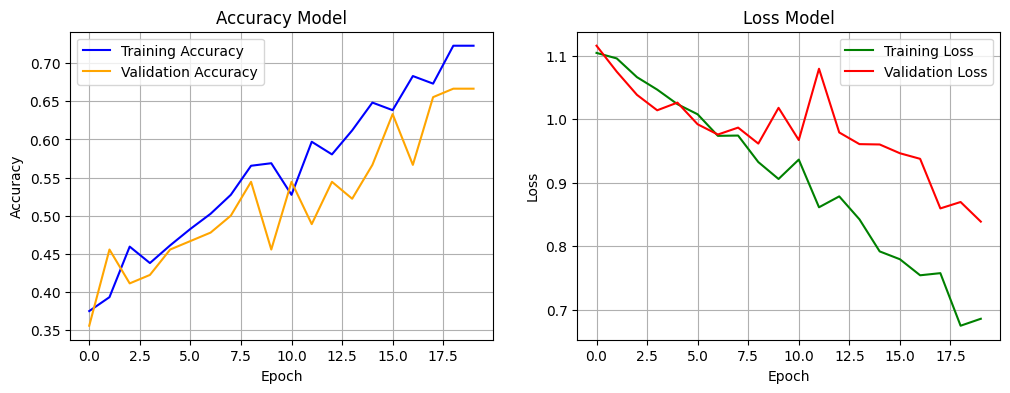

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.show()

In [41]:
#Load the Model:

loaded_model = tf.keras.models.load_model('s13802464.h5')


#Create Data Loader for New Dataset:

new_data_dir = pathlib.Path('/path to new dataset/')
new_datagen = ImageDataGenerator(rescale=1./255)
new_data_gen = new_datagen.flow_from_directory(
    new_data_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


#Evaluate the Model:

new_loss, new_accuracy = loaded_model.evaluate(new_data_gen)
print(f"\nNew Dataset Accuracy: {new_accuracy*100:.2f}%")